# Homework4 Duality

In [1]:
import numpy as np
import cvxpy as cp

## Numerical perturbation analysis example
Minimize $x_1^2 + 2x_2^2 -x_1x_2 - x_1$  
subject to  
$x_1 + 2x_2 \leq u_1$,  
$x_1 - 4x_2 \leq u_2$,  
$x_1 + x_2 \geq -5$

In [14]:
x = cp.Variable(2)
P = np.array([[1.0, -0.5], 
              [-0.5, 2.0]])
obj = cp.Minimize(cp.quad_form(x, P) - x[0])

u1 = -2.0
u2 = -3.0

cst = [x[0] + 2*x[1] <= u1, x[0] - 4*x[1] <= u2, x[0] + x[1] >= -5]

prob = cp.Problem(obj, cst)
p_star = prob.solve()
lamb1 = cst[0].dual_value
lamb2 = cst[1].dual_value
lamb3 = cst[2].dual_value

print("x_optimal is %s" % x.value)
print("lambda1_optimal: %.3f" % lamb1)
print("lambda2_optimal: %.3f" % lamb2)
print("lambda3_optimal is %.3f" % lamb2)

x_optimal is [-2.33333333  0.16666667]
lambda1_optimal: 3.389
lambda2_optimal: 2.444
lambda3_optimal is 2.444


### Check KKT condition:  
1. primal constraints (see above)
2. dual constraints: $\lambda_i^* \geq 0$ for all i
3. complementary slackness: $\lambda_i^* \cdot f_i(x^*) = 0$ for all i
4. gradient vanishes: $2x_1-x_2-1 + \lambda_1 + \lambda_2 - \lambda_3 =0$, $4x_2 - x_1 + 2\lambda_1 - 4\lambda_2 - \lambda_3 = 0$

In [16]:
print("lambda1 * f1: %f" % (lamb1 * (x.value[0] + 2*x.value[1] - u1)))
print("lambda2 * f2: %f" % (lamb2 * (x.value[0] - 4*x.value[1] - u2)))
print("lambda3 * f3: %f" % (lamb3 * (-x.value[0] - x.value[1] - 5)))

print("Check gradient conditions:")
print(2 * x.value[0] - x.value[1] - 1 + lamb1 + lamb2 - lamb3)
print(4 * x.value[1] - x.value[0] + 2 * lamb1 - 4 * lamb2 - lamb3)

lambda1 * f1: 0.000000
lambda2 * f2: 0.000000
lambda3 * f3: -0.000000
Check gradient conditions:
0.0
0.0


Now solve permuted versions of the QP:  
$u_1 = -2 + \delta_1$, $u_2 = -3 + \delta_2$, where $\delta_i = \{0, -0.1, 0.1\}$  

Use the equation: $p^*(u,v) \approx p^*(0,0) - u^T\lambda^* - v^T\mu^*$ to get the prediction value $p^*_{pred}(\delta_1, \delta_2)$  
Compare it with the actual optimal value: $p^*_{exact}(\delta_1, \delta_2)$

In [11]:
delta1 = [0.0, -0.1, 0.1]
delta2 = [0.0, -0.1, 0.1]
for i in range(len(delta1)):
    u1 = -2.0 + delta1[i]
    for j in range(len(delta2)):
        pred = p_star - delta1[i] * lamb1 - delta2[j] * lamb2
        u2 = -3.0 + delta2[j]
        cst = [x[0] + 2*x[1] <= u1, x[0] - 4*x[1] <= u2, x[0] + x[1] >= -5]
        prob = cp.Problem(obj, cst)
        prob.solve()
        print("u1 = %.1f, u2 = %.1f, prediction: %.3f, p_optimal: %.3f, diffence is %f" 
              % (u1, u2, pred, prob.value, prob.value - pred))

u1 = -2.0, u2 = -3.0, prediction: 8.222, p_optimal: 8.222, diffence is 0.000000
u1 = -2.0, u2 = -3.1, prediction: 8.467, p_optimal: 8.469, diffence is 0.002222
u1 = -2.0, u2 = -2.9, prediction: 7.978, p_optimal: 7.980, diffence is 0.002222
u1 = -2.1, u2 = -3.0, prediction: 8.561, p_optimal: 8.565, diffence is 0.003889
u1 = -2.1, u2 = -3.1, prediction: 8.806, p_optimal: 8.816, diffence is 0.010000
u1 = -2.1, u2 = -2.9, prediction: 8.317, p_optimal: 8.319, diffence is 0.002222
u1 = -1.9, u2 = -3.0, prediction: 7.883, p_optimal: 7.887, diffence is 0.003889
u1 = -1.9, u2 = -3.1, prediction: 8.128, p_optimal: 8.130, diffence is 0.002222
u1 = -1.9, u2 = -2.9, prediction: 7.639, p_optimal: 7.649, diffence is 0.010000


## A simple example
minimize $x^2 + 1$  
subject to $(x-2)(x-4) \leq 0$  
The lagrangian function is $L = x^2 + 1 + \lambda (x-2)(x-4)$

In [17]:
import matplotlib.pyplot as plt

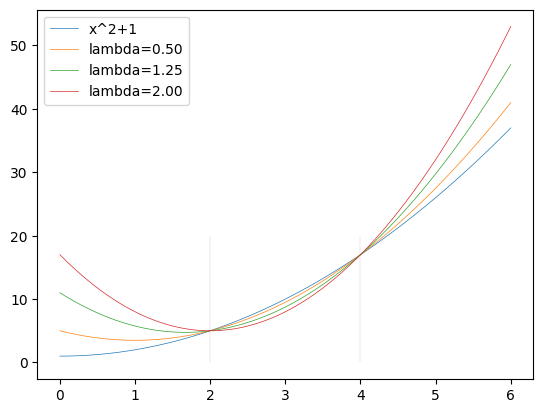

In [18]:
x = np.linspace(0, 6, 1000)
y = x ** 2 + 1

plt.plot(x, y, linewidth=0.5)
legs = ['x^2+1']
lamb = np.linspace(0.5, 2, 3)
for l in lamb:
    plt.plot(x, y + l * np.multiply((x - 2), (x - 4)), linewidth=0.5)
    legs.append('lambda=%.2f' % l)
plt.vlines(x=[2, 4], ymin=0, ymax=[20, 20], colors='purple', linewidth=0.2,
           linestyles='dotted', label='feasible set boundary')
plt.legend(legs)
plt.show()

## Option price bounds
Check [this](https://courses.edx.org/assets/courseware/v1/1c4433c8343544f614abeff62cf67dcf/asset-v1:StanfordOnline+SOE-YCVX0001+1T2020+type@asset+block/hw4sol.pdf) for answer.  
The original question can be converted to:  
minimize $p_n$  
subject to $V_Ty=p$, $y \geq 0$ 